In [3]:
import numpy as np

def run_longest_chain_sim(propagation_time, time_between_blocks, N):
    def chain_length(connections, block_index):
        length = 0
        parent_block = block_index
        while parent_block != 0:
            parent_block = connections[parent_block]
            length = length + 1

        return length

    def get_tails(connections):
        return [i for i in range(N) if i not in connections]

    def get_longest_chain_tail(connections, block_times, current_block_time):
        max_visible_time = current_block_time - propagation_time

        tails = get_tails(connections)
        visible_tails = [i for i in tails if block_times[i] < max_visible_time]

        # If there are no visible tails, approve the genesis
        if len(visible_tails) == 0:
            return 0

        chain_lengths = [chain_length(connections, i) for i in visible_tails]
        return visible_tails[np.argmax(chain_lengths)]

    def get_longest_chain_length(connections, block_times):
        return chain_length(connections, get_longest_chain_tail(connections, block_times, np.inf))
    

    total_time = N * time_between_blocks
    block_times = np.sort(np.random.uniform(0, total_time, N))

    connections = [0]
    for block_index in range(1,N):
        current_block_time = block_times[block_index]
        connections.append(get_longest_chain_tail(connections, block_times, current_block_time))

    longest_chain_length = get_longest_chain_length(connections, block_times)
    return longest_chain_length


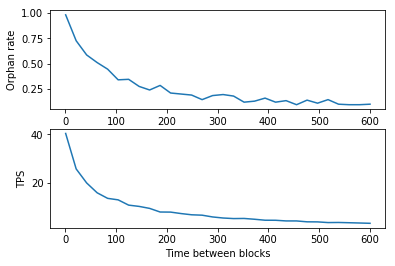

In [10]:
from matplotlib import pyplot as plt
import numpy as np

propagation_time = 60
N = 200
sim_count = 30

time_between_blocks_values = np.linspace(1, 600, num=sim_count)

longest_chains = []
for time_between_blocks in time_between_blocks_values:
    longest_chain = run_longest_chain_sim(propagation_time, time_between_blocks, N)
    longest_chains.append(longest_chain)

fig, axs = plt.subplots(2,1)

# Lost blocks plot
lost_blocks_percent = 1.0 - np.divide(longest_chains, N)

ax = axs[0]
ax.plot(time_between_blocks_values, lost_blocks_percent)
ax.set_xlabel('Time between blocks')
ax.set_ylabel('Orphan rate')

# TPS plot
transactions_per_block = 2020
total_sim_times = total_time = N * time_between_blocks_values
TPS = transactions_per_block * np.divide(longest_chains, total_sim_times)

ax = axs[1]
ax.plot(time_between_blocks_values, TPS)
ax.set_xlabel('Time between blocks')
ax.set_ylabel('TPS')

plt.show()   
    